In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gc
import os
import sys
import csv
%matplotlib inline


C:\Users\Admin\AppData\Local\Temp\ipykernel_10600\208217517.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
cab_data = pd.read_csv(r"C:\Users\Admin\Downloads\data_analysis\cab_rides.csv")
weather_data = pd.read_csv(r"C:\Users\Admin\Downloads\data_analysis\weather.csv")
cab_data.head()


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [4]:
cab_data.columns



Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [5]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [6]:
import datetime
cab_data['date_time']= pd.to_datetime(cab_data['time_stamp'])
cab_data
weather_data['datetime']= pd.to_datetime(weather_data['time_stamp'])

In [7]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time'],
      dtype='object')

In [8]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind', 'datetime'],
      dtype='object')

In [9]:
cab_data.shape

(693071, 11)

In [10]:
weather_data.shape

(6276, 9)

In [11]:
cab_data.describe()

,distance,time_stamp,price,surge_multiplier,date_time
count,693071.000000,6.930710e+05,637976.000000,693071.000000,693071
mean,2.189430,1.544046e+12,16.545125,1.013870,1970-01-01 00:25:44.045709764
min,0.020000,1.543204e+12,2.500000,1.000000,1970-01-01 00:25:43.203646318
25%,1.280000,1.543444e+12,9.000000,1.000000,1970-01-01 00:25:43.443968356
50%,2.160000,1.543737e+12,13.500000,1.000000,1970-01-01 00:25:43.737477529
75%,2.920000,1.544828e+12,22.500000,1.000000,1970-01-01 00:25:44.827508976
max,7.860000,1.545161e+12,97.500000,3.000000,1970-01-01 00:25:45.160510943
std,1.138937,6.891925e+08,9.324359,0.091641,NaN


In [12]:
cab_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223


In [13]:
weather_data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind,datetime
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000,6276
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812,1970-01-01 00:00:01.543857377
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000,1970-01-01 00:00:01.543203644
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500,1970-01-01 00:00:01.543386870
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000,1970-01-01 00:00:01.543513974
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000,1970-01-01 00:00:01.544690701
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000,1970-01-01 00:00:01.545158702
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466,NaN


In [14]:
a=pd.concat([cab_data,weather_data])

In [15]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,temp,location,clouds,pressure,rain,humidity,wind,datetime
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [16]:
a['day']=a.date_time.dt.day
a['hour']=a.date_time.dt.hour

In [17]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,humidity,wind,datetime,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.0
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.0
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.0
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.0
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1.0,0.0


In [18]:
a.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,humidity,wind,datetime,day,hour
6271,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.72,North Station,0.89,1000.69,NaN,0.96,1.52,1970-01-01 00:00:01.543819974,NaN,NaN
6272,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.85,Northeastern University,0.88,1000.71,NaN,0.96,1.54,1970-01-01 00:00:01.543819974,NaN,NaN
6273,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.82,South Station,0.89,1000.70,NaN,0.96,1.54,1970-01-01 00:00:01.543819974,NaN,NaN
6274,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.78,Theatre District,0.89,1000.70,NaN,0.96,1.54,1970-01-01 00:00:01.543819974,NaN,NaN
6275,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.69,West End,0.89,1000.70,NaN,0.96,1.52,1970-01-01 00:00:01.543819974,NaN,NaN


In [19]:
a.fillna(0,inplace=True)
#fills 0 in place of NAN

C:\Users\Admin\AppData\Local\Temp\ipykernel_10600\2551785673.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  a.fillna(0,inplace=True)


In [20]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,humidity,wind,datetime,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0


In [21]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'datetime', 'day', 'hour'],
      dtype='object')

In [22]:
a.groupby('cab_type').count()
#groupby used to group acc to cab type eg lyft,uber

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,temp,location,clouds,pressure,rain,humidity,wind,datetime,day,hour
cab_type,,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


<Axes: xlabel='cab_type'>

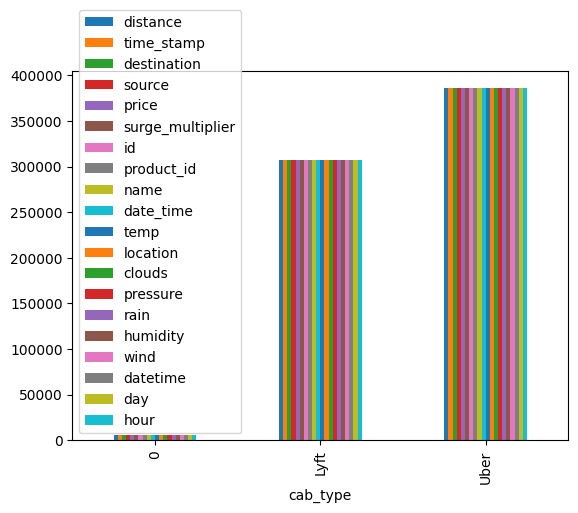

In [23]:
a.groupby('cab_type').count().plot.bar()

<Axes: xlabel='price'>

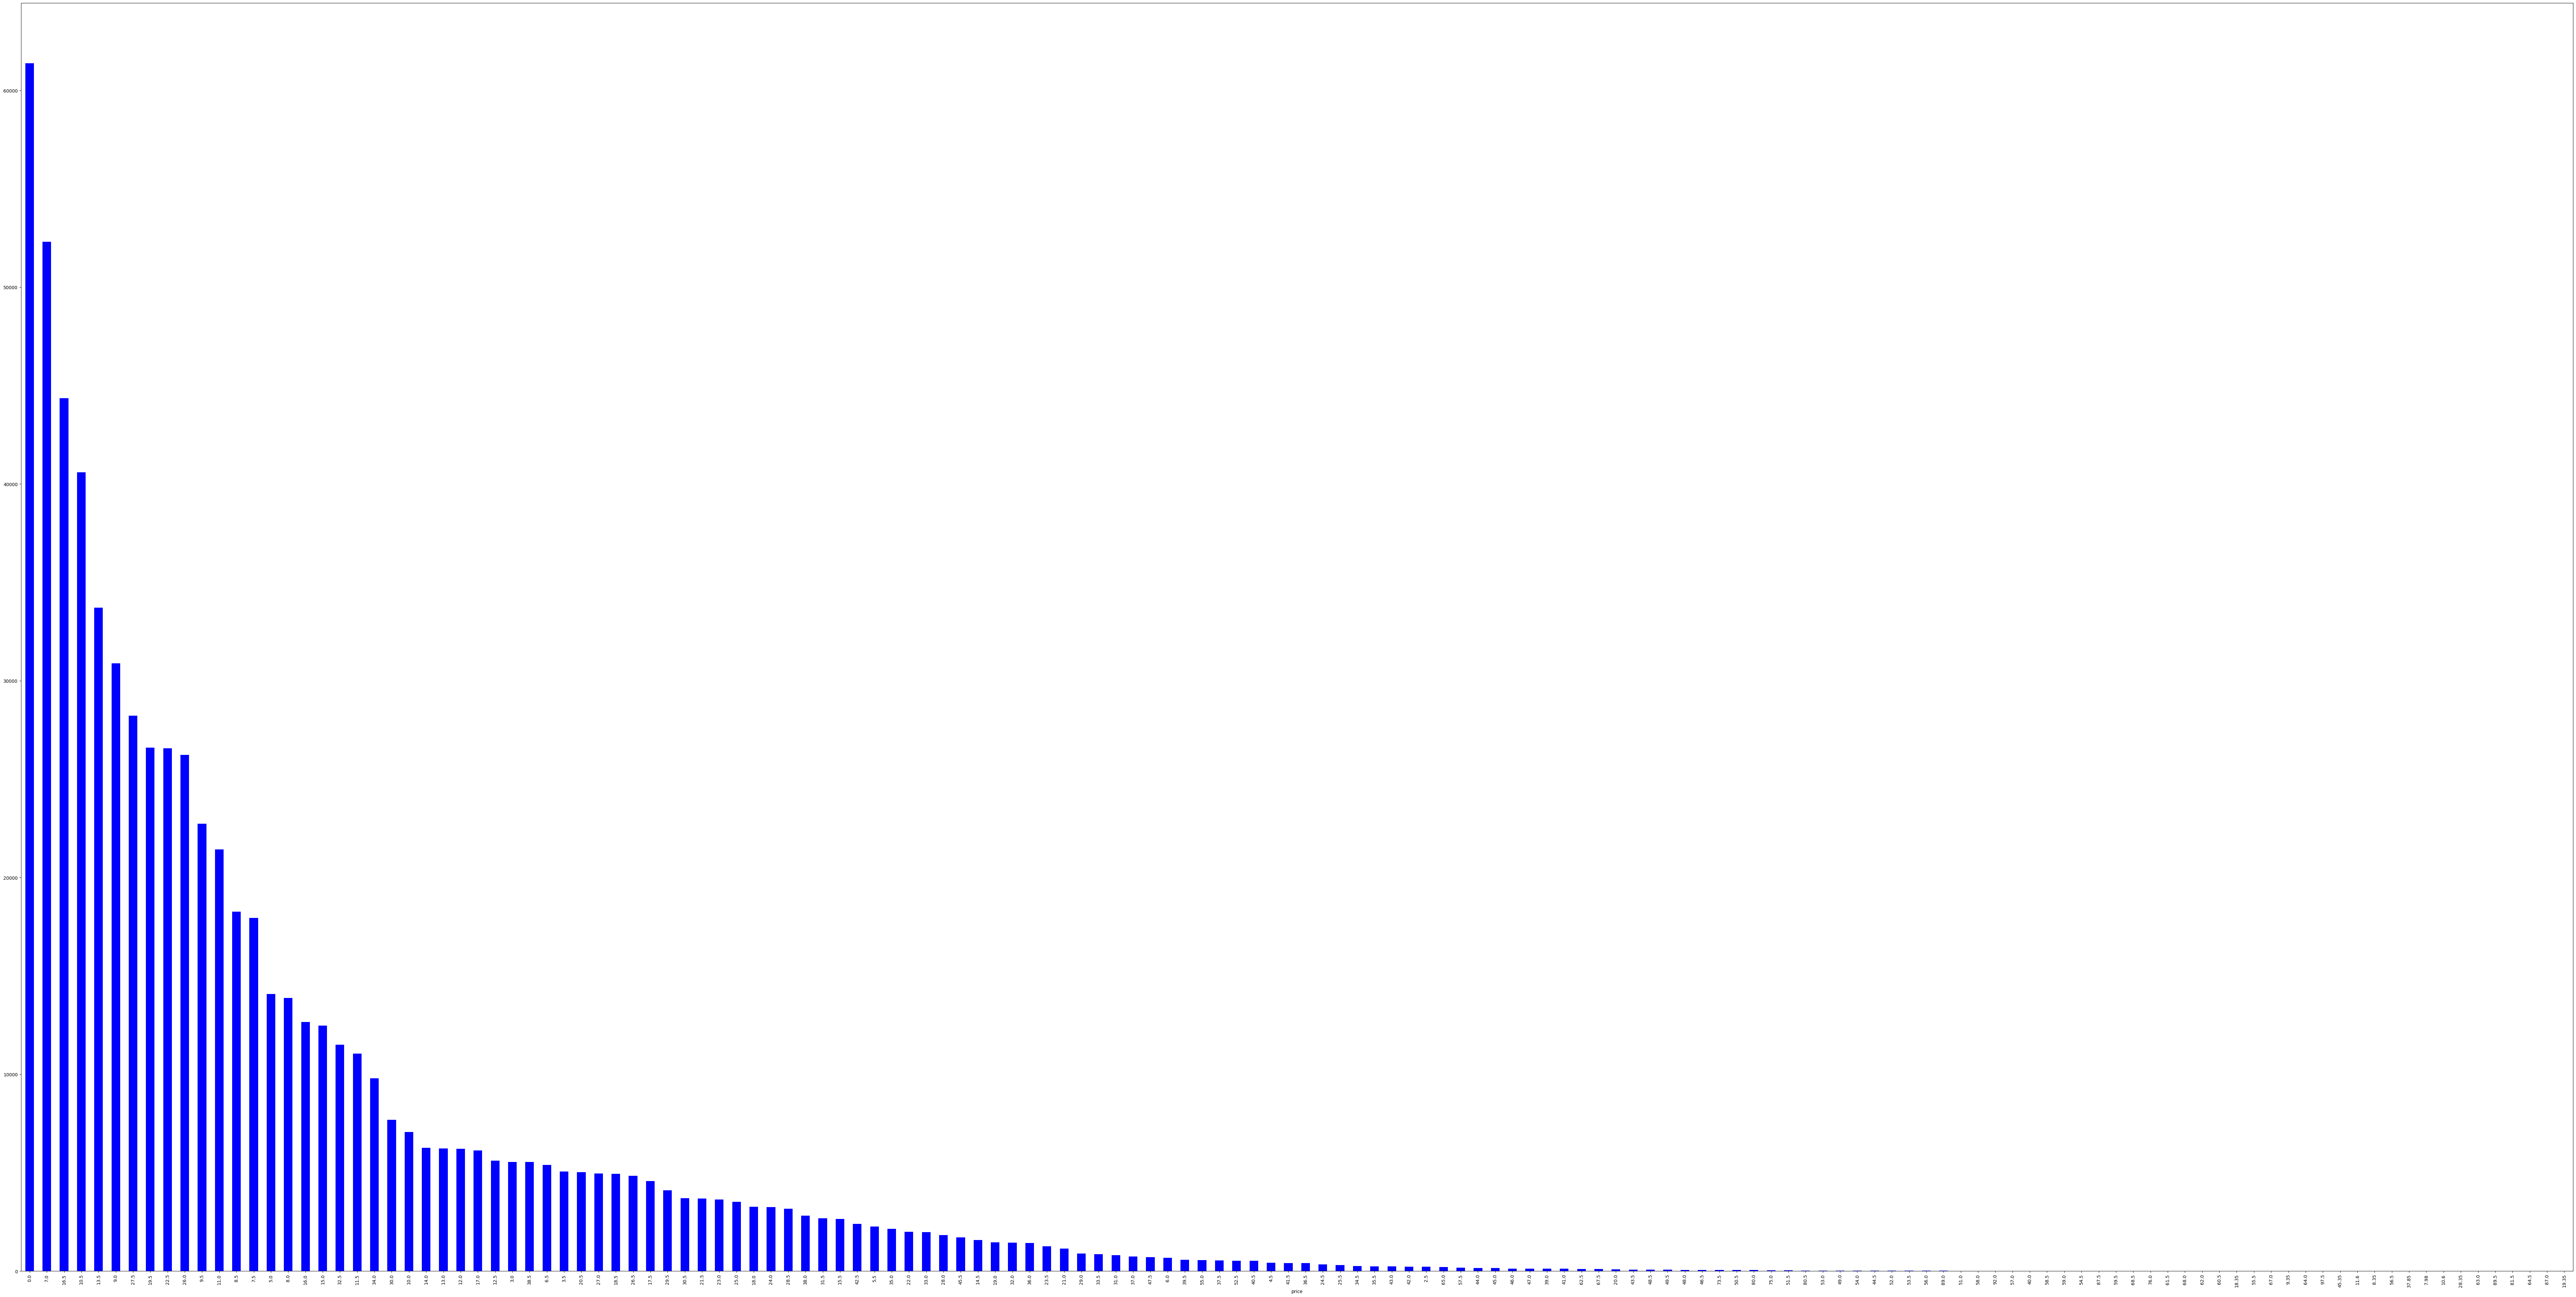

In [24]:
a['price'].value_counts().plot(kind='bar',figsize=(100,50),color='blue')

<Axes: xlabel='hour'>

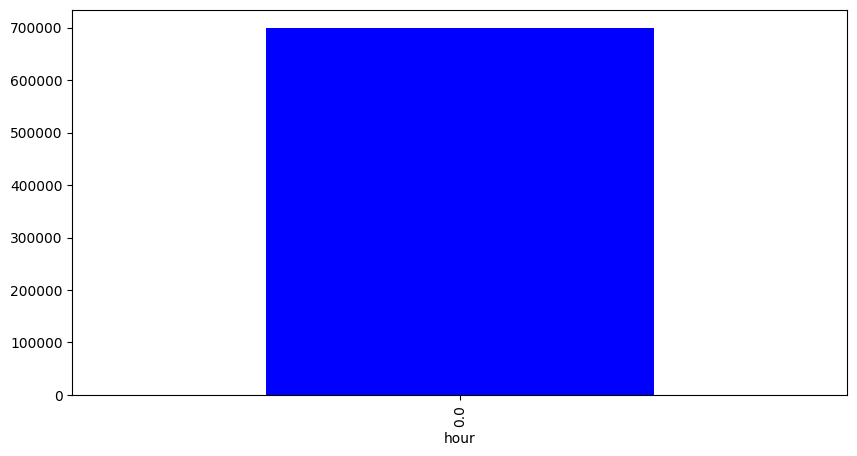

In [25]:
a['hour'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

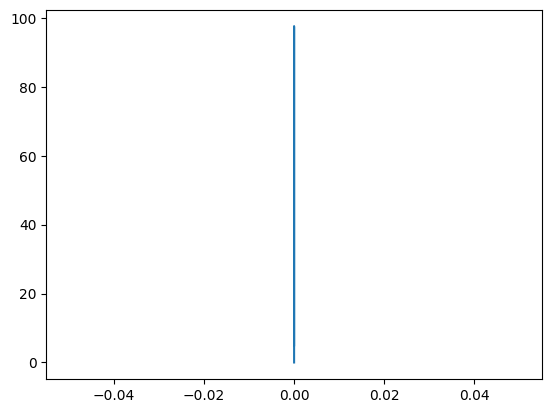

In [26]:
#seeing how price and hour vary
import matplotlib.pyplot as plt
x=a['hour']
y=a['price']
plt.plot(x,y)
plt.show()

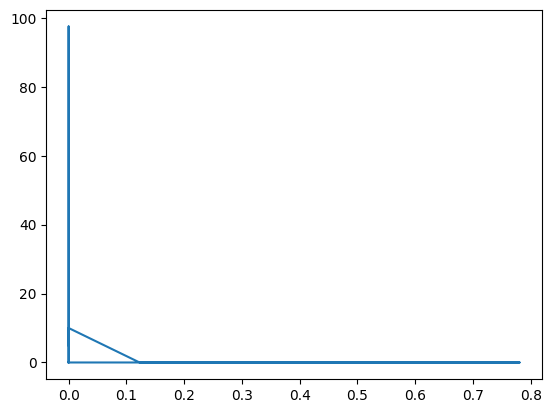

In [27]:
x=a['rain']
y=a['price']
plt.plot(x,y)
plt.show()

In [28]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'datetime', 'day', 'hour'],
      dtype='object')

In [29]:
x1=a[['distance','temp','clouds','pressure', 'humidity', 'wind','rain','day', 'hour','surge_multiplier']]  #training data
y1=a['price']                                         #label data

In [30]:
#using skicit-learn tosplit data into training and testing sets
from sklearn.model_selection import train_test_split
# split  in training and testing sets 
x_train,y_train,x_test,y_test = train_test_split(x1,y1, test_size= 0.25,random_state=42)

In [31]:
#.fit to train model
linear=LinearRegression()
linear.fit(x_train,x_test)

LinearRegression()

In [32]:
predictions=linear.predict(y_train)     # checking predction of model
predictions

array([32.54791635, 14.75560763, 16.81696874, ..., 11.82898384,
       11.85443274, 13.22867348])

In [33]:
df=pd.DataFrame({'Actual': y_test, 'Predicted':predictions})
df

,Actual,Predicted
81607,42.5,32.547916
354,0.0,14.755608
471801,32.5,16.816969
407645,27.5,10.480192
474760,27.5,10.556539
...,...,...
538489,7.5,10.709232
579511,13.5,15.519075
5421,9.0,11.828984
279982,8.0,11.854433


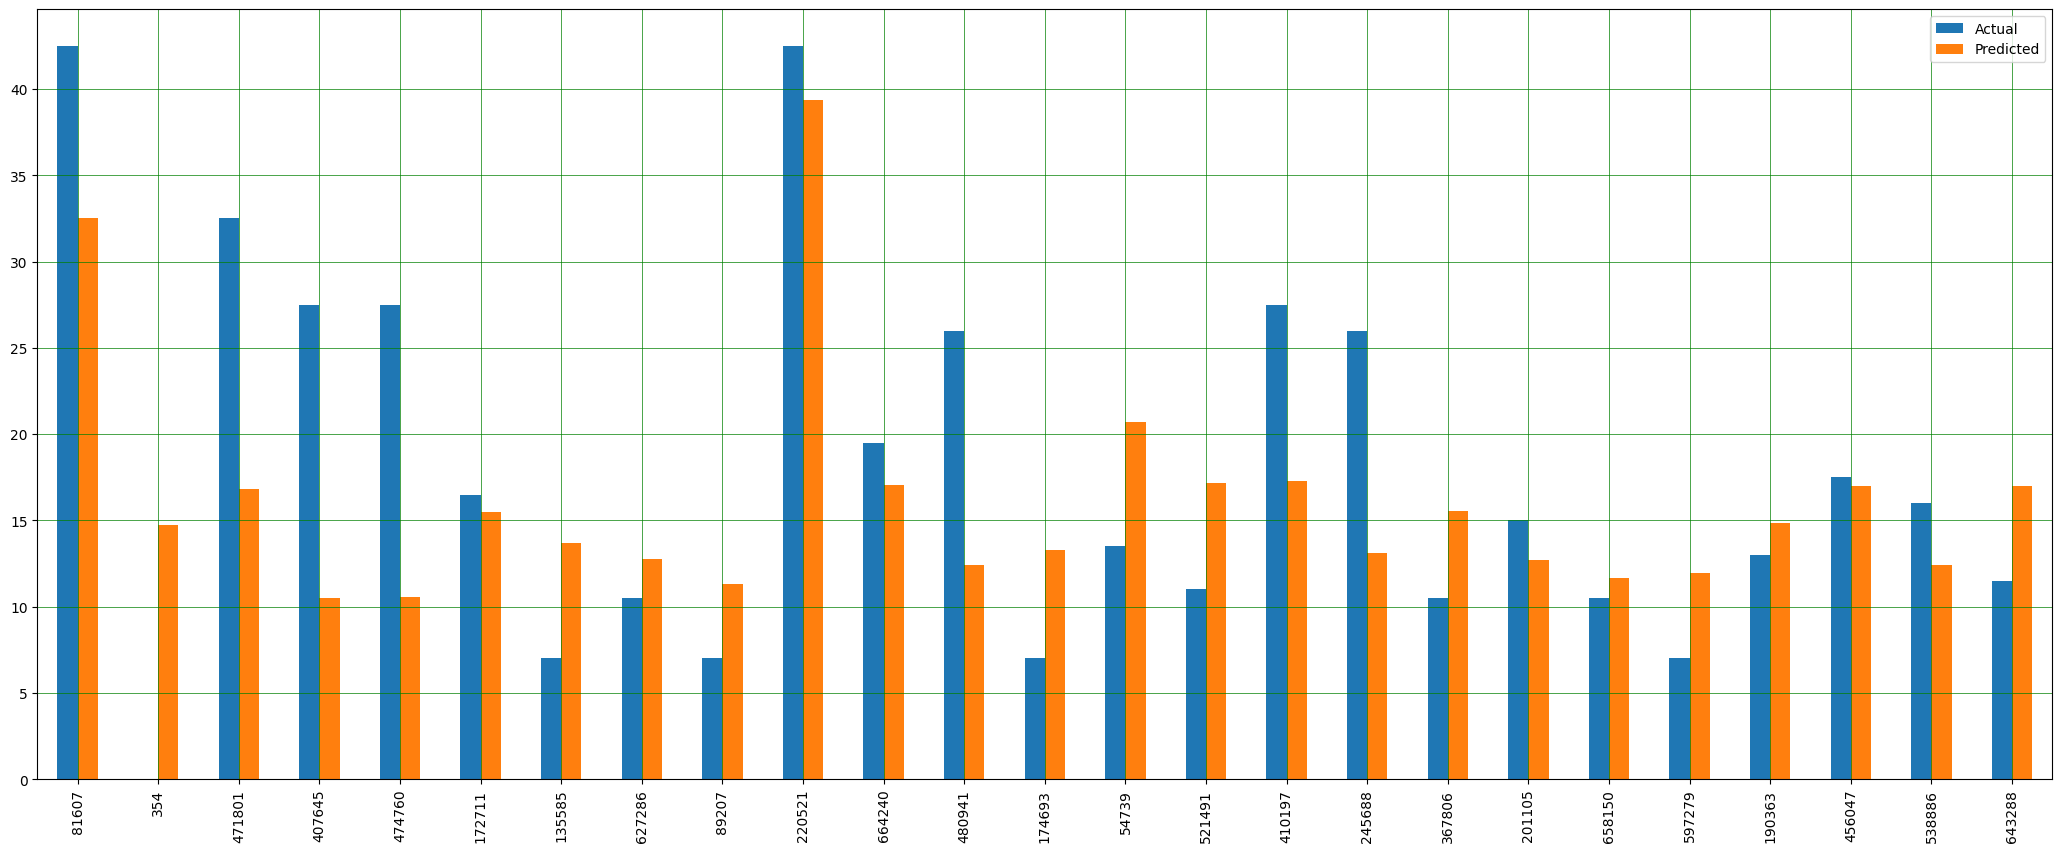

In [35]:
#plotting  actual and predicting valuesf for better understanding
df1 =df.head(25)
df1.plot(kind='bar',figsize=(26,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle='-',linewidth='0.5',color='black')
plt.show()